In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.utils import plot_model

## Loading data

In [54]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

## Analyzing data

In [55]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [56]:
train_data["keyword"].value_counts().head(3)

keyword
fatalities    45
deluge        42
armageddon    42
Name: count, dtype: int64

In [57]:
train_data["location"].value_counts().head(3)

location
USA              104
New York          71
United States     50
Name: count, dtype: int64

In [58]:
def clean_data(data:pd.DataFrame):
    data.drop(columns=["location", "id"], inplace=True)
    data.fillna("",inplace=True)    

clean_data(train_data)
clean_data(test_data)

In [59]:
train_labels = train_data.pop("target")

In [60]:
train_data.head(3)

,keyword,text
0,,Our Deeds are the Reason of this #earthquake M...
1,,Forest fire near La Ronge Sask. Canada
2,,All residents asked to 'shelter in place' are ...


In [61]:
train_data.head(3)

,keyword,text
0,,Our Deeds are the Reason of this #earthquake M...
1,,Forest fire near La Ronge Sask. Canada
2,,All residents asked to 'shelter in place' are ...


In [62]:
print(f'No disaster: {train_data[train_labels == 0]["text"].values[1]}')
print(f'Disaster: {train_data[train_labels == 1]["text"].values[1]}')

No disaster: I love fruits
Disaster: Forest fire near La Ronge Sask. Canada


In [63]:
print("Train shape:",train_data.shape)
print("Test shape:",test_data.shape)

Train shape: (7613, 2)
Test shape: (3263, 2)


In [64]:
train_labels.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

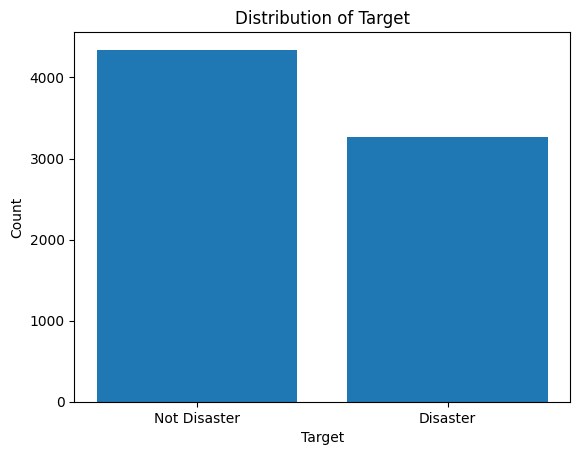

In [65]:
target_counts = train_labels.value_counts()

# Create a bar plot
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(target_counts.index, ['Not Disaster', 'Disaster'])
plt.title('Distribution of Target')
plt.show()

In [66]:
import re
# Regular expression pattern to match URLs
pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def substitute_links(text):
    
    # Substitute links in the text with "website: domain_name"
    substituted_text = re.sub(pattern, 'website: domain_name', text)

    return substituted_text

# Example usage
text = "Check out this website: https://example.com and also visit http://openai.com"

substituted_text = substitute_links(text)
print(substituted_text)

Check out this website: website: domain_name and also visit website: domain_name


In [67]:
max_sequence_length = 0
max_sequence_length_keyword = 0
# Iterate over text and keyword columns
for text, keyword in zip(train_data['text'], train_data['keyword']):
    text_length = len(text.split())
    keyword_length = len(keyword.split())

    # Update maximum sequence length
    max_sequence_length = max(max_sequence_length, text_length, keyword_length)
    
for keyword in train_data['keyword']:
    keyword_length = len(keyword.split())

    # Update maximum sequence length
    max_sequence_length_keyword = max(max_sequence_length_keyword, keyword_length)

print("Maximum Sequence Length:", max_sequence_length)
print("Maximum Sequence Length Keyword:", max_sequence_length_keyword)

Maximum Sequence Length: 31
Maximum Sequence Length Keyword: 1


In [68]:

# Step 1: Tokenize text and keyword columns
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(train_data['text'])
train_text_sequences = text_tokenizer.texts_to_sequences(train_data['text'])

keyword_tokenizer = Tokenizer()
keyword_tokenizer.fit_on_texts(train_data['keyword'])
train_keyword_sequences = keyword_tokenizer.texts_to_sequences(train_data['keyword'])

# Step 2: Pad sequences
# Adjust this value based on your data
train_text_sequences = pad_sequences(train_text_sequences, maxlen=max_sequence_length)
train_keyword_sequences = pad_sequences(train_keyword_sequences, maxlen=max_sequence_length_keyword)

# Step 3: Create the dataset
labels = train_labels
dataset = tf.data.Dataset.from_tensor_slices(((train_text_sequences, train_keyword_sequences), labels))
dataset = dataset.shuffle(1000).batch(32)


In [69]:
w_index = 1
print(train_data["text"][0].split()[w_index])
print(text_tokenizer.texts_to_sequences(train_data["text"][0].split()[w_index]))

Deeds
[[400], [579], [579], [400], [107]]


In [70]:
print(train_data["text"][0])
print(train_data["text"][0].split())
print(len(train_data["text"][0].split()))
print(len(text_tokenizer.texts_to_sequences(train_data["text"][0])))
text_tokenizer.texts_to_sequences(train_data["text"][0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
13
69


[[403],
 [82],
 [566],
 [],
 [400],
 [579],
 [579],
 [400],
 [107],
 [],
 [5],
 [566],
 [579],
 [],
 [1],
 [1707],
 [579],
 [],
 [566],
 [579],
 [5],
 [107],
 [403],
 [402],
 [],
 [403],
 [1185],
 [],
 [1],
 [1707],
 [10],
 [107],
 [],
 [],
 [579],
 [5],
 [566],
 [1],
 [1707],
 [3729],
 [82],
 [5],
 [2032],
 [579],
 [],
 [283],
 [5],
 [3063],
 [],
 [5],
 [1427],
 [1427],
 [5],
 [1707],
 [],
 [1185],
 [403],
 [566],
 [1794],
 [10],
 [1129],
 [579],
 [],
 [82],
 [107],
 [],
 [5],
 [1427],
 [1427]]

In [77]:
# Define the inputs
input_text = Input(shape=(max_sequence_length,), name='input_text')
input_keyword = Input(shape=(max_sequence_length_keyword,), name='input_keyword')

# Text part
embedding = Embedding(name="embedding",input_dim=len(text_tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length)(input_text)
lstm_text = Bidirectional(LSTM(32, return_sequences=True))(embedding)

# Keyword part
dense_keyword = Dense(64, activation='relu')(input_keyword)
dense_keyword_repeated = RepeatVector(max_sequence_length)(dense_keyword)

# Concatenate the outputs
concatenated = Concatenate(axis=-1)([lstm_text, dense_keyword_repeated])

# Other layers
lstm_combined = Bidirectional(LSTM(32))(concatenated)
dense = Dense(32, activation='relu')(lstm_combined)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout)

# Create the model
model = tf.keras.Model(inputs=[input_text, input_keyword], outputs=output)

In [78]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_text (InputLayer)     [(None, 31)]                 0         []                            
                                                                                                  
 input_keyword (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 31, 64)               1452864   ['input_text[0][0]']          
                                                                                                  
 dense_15 (Dense)            (None, 64)                   128       ['input_keyword[0][0]']       
                                                                                            

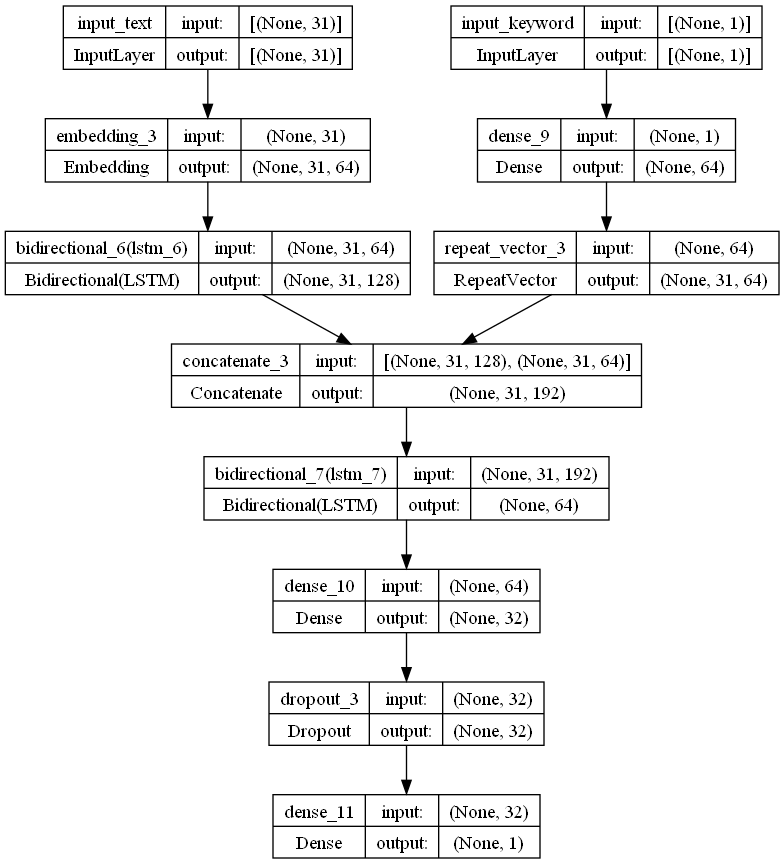

In [73]:
plot_model(model, show_shapes=True)

In [79]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit({'input_text': train_text_sequences, 'input_keyword': train_keyword_sequences}, labels, epochs=10)

Epoch 1/10
238/238 [==============================] - 13s 29ms/step - loss: 0.6898 - accuracy: 0.5563
Epoch 2/10
238/238 [==============================] - 7s 29ms/step - loss: 0.5252 - accuracy: 0.7705
Epoch 3/10
238/238 [==============================] - 7s 28ms/step - loss: 0.3093 - accuracy: 0.8941
Epoch 4/10
238/238 [==============================] - 7s 29ms/step - loss: 0.2183 - accuracy: 0.9331
Epoch 5/10
238/238 [==============================] - 8s 32ms/step - loss: 0.1316 - accuracy: 0.9656
Epoch 6/10
205/238 [========================>.....] - ETA: 1s - loss: 0.0974 - accuracy: 0.9768

In [75]:
len(text_tokenizer.word_index)

22700